## MATH 497: Final Project
### Acceptance-Rejection Algorithm

#### Kendra Noneman

**Question:**
Suppose 10 independent observations (8, 3, 4, 3, 1, 7, 2, 6, 2, 7) are observed from the model<br>
Xi|λ ∼ Poisson(λ)</center> 

A lognormal prior distribution for λ is assumed:<br>
log λ ∼ N(log 4, 0.5^2).<br>

*Implement an Acceptance-Rejection Algorithm to generate random samples from the posterior distribution of λ.*

#### **1. Print the posterior mean estimate for λ and its standard deviation.**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
from scipy.stats import norm
import math
import seaborn as sns

lambda = 4.3
sigma = 2.368543856465402


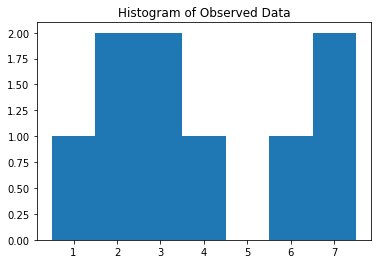

In [4]:
N = 1000 #number of samples
data = np.array([8,3,4,3,1,7,2,6,2,7])

plt.hist(data, bins=np.arange(data.min(), data.max()+1)-0.5)
plt.title("Histogram of Observed Data")

#log-normally distributed prior
mu = np.log(4)
var = 0.5**2
sigma = math.sqrt(var)

#Likelihood: L(λ|x)
#Prior: f(λ)

lambda_data = np.mean(data)
print("lambda =", lambda_data)#this maximizes the likelihood function
sigma_data = np.std(data)
print("sigma =", sigma_data)

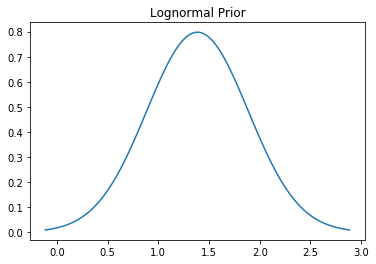

In [12]:
#lognormal prior distribution for λ 
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Lognormal Prior')
plt.show()

In [52]:
s = np.random.poisson(lam=(100., 500.), size=(100, 2))

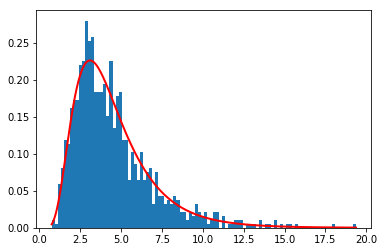

In [40]:
#Prior: f(x)
prior = np.random.lognormal(mu, sigma, N)
count, bins, ignored = plt.hist(prior, 100, density=True, align='mid')
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1000,) and (10,)

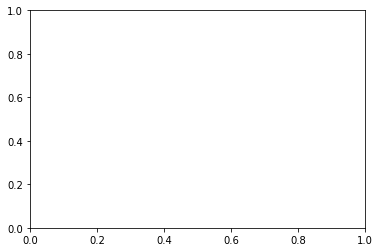

In [51]:
poiss = np.random.poisson(10, 10)

y = np.linspace(min(bins), max(bins), N)
poiss_pmf = poisson.pmf(data, poiss, loc=0)

plt.plot(y, poiss_pmf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

#### **2. Present the output of the algorithm by a density histogram of the samples along with its KDE.**

In [ ]:
# sample size
n = 1000
U = np.random.rand(n) #generate random numbers from standard uniform 

lambd = 2 # Note: lambda can NOT be used as a variable name because it is a keyword reserved by Python
X = -np.log(U)/lambd
sns.distplot(X, hist=True, kde=True, 
             bins=20, color = 'blue',
             hist_kws={'edgecolor':'black'},
             label='Hist')
# Add labels
plt.title('PDF, KDE and Histogram of Random Numbers')
plt.xlabel('x')
plt.ylabel('Density')


PDF_EXP = lambda x:  lambd*np.exp(-lambd*x)

xgrid = np.linspace(0, 3, 100)
ygrid = PDF_EXP(xgrid)
plt.plot(xgrid, ygrid, color='green', label='PDF')
plt.legend()
plt.show()